# "Определение перспективного тарифа для компании "Мегалайн"
<a class="tocSkip">

## Цель исследования

<div style="border: ridge black 3px; padding: 25px">
    
<b>Целью данного исследования является выявление наиболее прибыльного тарифа среди 2-х тарифов компании "Мегалайн": "Смарт" и "Ультра".</b><br><br>

Данное исследование преследует цель помочь коммерческому департаменту компании "Мегалайн" понять какой тариф приносит больше прибыли для дальнейшего принятия решений о коррекции рекламного бюджета.<br><br>
    
Для анализа представлена выборка с данными 500 пользователей "Мегалайна" за 2018 г.<br>
Мы определим сколько в среднем в месяц тратят трафика пользователи каждого из тарифов, определим среднюю выручку в месяц с каждого пользователя, изучим их поведение и проверим 2 гипотезы.<br><br>
    
В конце иследования сформулируем общий вывод.<br>
    
</div>

## Описание исходных данных
**Ниже представлено описание всей доступной нам информации по тарифам и содержимому 5-ти 
таблиц**.

### Описание тарифов

**Тариф «Смарт»**
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
 - минута разговора: 3 рубля
 - сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
 - минута разговора: 1 рубль
 - сообщение: 1 рубль
 - 1 Гб интернет-трафика: 150 рублей
 
**Примечание:** «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Описание данных

**Таблица users (информация о пользователях):**

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

**Таблица calls (информация о звонках):**

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)



## Открытие данных
**Откроем файлы с данными, ознакомимся с общей информацией, а так же визуально посмотрим на внутреннее заполнение таблицы.**

In [1]:
# сразу на данном этапе импортируем основные библиотеки для будущих манипуляций

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
import math
import math as mt
from scipy import stats as st
from scipy.stats import norm

In [2]:
# откроем поочередно каждую из 5-ти таблиц, присваивая названия каждому датафрейму согласно его содержанию:
# `calls_data`, `internet_data`, `messages_data`, `tariffs_data`, `users_data`

calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')

Для нашего удобства переименуем сразу некоторые столбцы таблиц, т.к. некоторые дефолтные названия (исходя из описания в п.2.2.) не в полной мере отражают сути своего содержания.
Переименуем некоторые из них, добавив уточнения:

**Таблица calls (информация о звонках):**

- id — уникальный номер звонка **(---> call_id)**
- duration — длительность звонка в минутах **(---> call_duration)**

**Таблица messages (информация о сообщениях):**

- id — уникальный номер сообщения **(---> message_id)**

**Таблица internet (информация об интернет-сессиях):**

- id — уникальный номер сессии **(---> session_id)**

In [3]:
# для переименования используем метод `rename()`

calls_data = calls_data.rename({'id': 'call_id', 'duration': 'call_duration'}, axis = 'columns')
messages_data = messages_data.rename({'id': 'message_id'}, axis = 'columns')
internet_data = internet_data.rename({'id': 'session_id'}, axis = 'columns')

# используя цикл, посмотрим сразу на общую информацию по каждой таблице и выведем на экран содержимое 
# первых 10 строк:

calls_data.name = 'Таблица "Информация о звонках"'
internet_data.name = 'Таблица "Информация об интернет-сессиях"'
messages_data.name = 'Таблица "Информация о сообщениях"'
tariffs_data.name = 'Таблица "Информация о тарифах"'
users_data.name = 'Таблица "Информация о пользователях"'

for data in [calls_data, internet_data, messages_data, tariffs_data, users_data]:
    print(data.name)
    print('--------------------------------------------------------------------------------------------------------------')
    print(data.info())
    display(data.head(10))
    
    # для удобства при просмотре добавим такой `разграничитель`
    print('--------------------------------------------------------------------------------------------------------------')
    # и отступ
    print()                                                        

Таблица "Информация о звонках"
--------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
call_id          202607 non-null object
call_date        202607 non-null object
call_duration    202607 non-null float64
user_id          202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,call_id,call_date,call_duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


--------------------------------------------------------------------------------------------------------------

Таблица "Информация об интернет-сессиях"
--------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
session_id      149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,session_id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


--------------------------------------------------------------------------------------------------------------

Таблица "Информация о сообщениях"
--------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
message_id      123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,message_id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


--------------------------------------------------------------------------------------------------------------

Таблица "Информация о тарифах"
--------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


--------------------------------------------------------------------------------------------------------------

Таблица "Информация о пользователях"
--------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


--------------------------------------------------------------------------------------------------------------



**Мы видим, что:**
1. Датафрейм `call_data` содержит 4 столбца, 202607 наблюдений и не имеет пропусков. Но: в колонке `call_duration` можно визуально увидеть нулевые значения, далее проверим каким образом это произошло. 
2. Датафрейм `internet_data` содержит 5 столбцов, 149396 наблюдений и не имеет пропусков. Но: имеется столбец `Unnamed: 0`, который в описании данных не был упомянут и по содержанию в нем проставлены просто индексы, поэтому можем его весь удалить.
3. Датафрейм `messages_data` содержит 3 столбца, 123036 наблюдений и не имеет пропусков.
4. Датафрейм `tafiffs_data` содержит 8 столбцов и 2 наблюдения (что логично, 2 тарифа). Содержимое таблицы соответствует исходному описанию тарифов в п.2.1.
5. Датафрейм `users_data`содержит 8 столбцов и 500 наблюдений. Однако столбец `churn_date` имеет пропуски (заполнено только 38 строк (38 пользователей). Логично предположить, что это связано с тем, что отсутствие даты прекращения пользованием тарифа означает, что пользователь не отключался и продолжал пользоваться тарифом на момент сбора данных. Такие пропуски логически заполнить мы не сможем и нам это не нужно для текущей задачи, оставляем их.

**По типу данных имеются несостыковки**, для корректных будущих манипуляций изменим типы данных некоторых из столбцов в следующих датафреймах:
1. Датафрейм `call_data`: столбец `call_date` изменим на тип *'datetime'*, `call_duration` округлим в большую сторону и изменим на тип *'int'* (т.к. нам нужны целые минуты для удобства анализа).
2. Датафрейм `internet_data`: столбец `session_date` изменим на тип *'datetime'*, столбец `mb_used` округлим в большую сторону и изменим на *'int'* (будет удобнее работать с целочисленными Мегабайтами).
3. Датафрейм `messages_data`: столбец `message_date` изменим на тип *'datetime'*.
4. Датафрейм `users_data`: столбцы `reg_date`и `churn_date` изменим на тип *'datetime'*.

<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы:<br><br>
    
- Ознакомились с представленными таблицами: добавили корректировки в названия некоторых столбцов, оценили заполненность таблиц и тип данных каждого столбца 5-ти таблиц.<br>
- Обнаружили столбец, который можно удалить: `Unnamed: 0`.<br>
- Обнаружили некритичные пропуски только в 1 таблице `users_data` и нулевые значения в столбце `call_duration`, которые далее детальнее проверим и примем решение о необходимости изменения.<br>
- Описали необходимые изменения типов данных, которые нужно будет внести.<br>

Далее приступим непосредственно к самой предобработке.<br>
    
</div>

## Предобработка данных

In [4]:
# удалим столбец `Unnamed: 0` из датафрейма `internet_data`

del internet_data['Unnamed: 0']
internet_data.head(2)           # и проверим визуально по паре строк успешность  удаления      

,session_id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000


In [5]:
# приведем столбцы `call_date`, `session_date`, `message_date`, `reg_date`, `churn_date` к типу 'datetime'

calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')

# округлим  `call_duration`, `mb_used` в большую сторону и после - приведем их к типу 'int'
calls_data['call_duration'] = (np.ceil(calls_data['call_duration'])).astype('int')
internet_data['mb_used'] = (np.ceil(internet_data['mb_used'])).astype('int')

# выведем на экран типы данных для проверки

for data in [calls_data, internet_data, messages_data, users_data]:
    print(data.info())
    print('------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
call_id          202607 non-null object
call_date        202607 non-null datetime64[ns]
call_duration    202607 non-null int64
user_id          202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
session_id      149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
message_id      123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id   

Замена типов данных в необходимых нам столбцах выполнена успешно.

In [6]:
# проверим сколько всего "0" в столбце 'сall_duration' датафейма `calls_data`

print('% "нулевых" значений длительности разговора из общего числа наблюдений =', \
((calls_data.loc[calls_data['call_duration'] == 0, 'call_duration'].count() \
/len(calls_data['call_duration'])) \
*100).round(1))

# а так же проверим по аналогии какой % нулевого трафика в столбце `mb_used` датафрейма `internet_data`

print('% "нулевых" значений потраченного за сессию интернет-трафика =', \
((internet_data.loc[internet_data['mb_used'] == 0, 'mb_used'].count() \
/len(internet_data['mb_used'])) \
*100).round(1))

% "нулевых" значений длительности разговора из общего числа наблюдений = 19.6
% "нулевых" значений потраченного за сессию интернет-трафика = 13.1


Нулевые значения могут означать, что абонентом был сделан исходящий вызов, но принимающая сторона не ответила на звонок, поэтому система прописала 0. Точно так же и с интернет-сессиями: подключение могло быть активно, но операций в интернете пользователь так и не сделал. Иначе, при звонке/интренет-сессии даже в 1 секунду/1 килобайт оператором  прописалась бы 1 минута/1 Мб (*согласно информации из п.2.1.*).

Для нашего анализа такие нулевые строки не несут смысловой нагрузки и не влияют на расход трафика, поэтому за ненадобностью мы их удалим. 

In [7]:
# удаляем в столбцах `call_duration` и 'mb_used'  все строки с "0"

calls_data = calls_data[~(calls_data[['call_duration']]==0).all(axis=1)]
print('Нулевых значений в столбце "call_duration" осталось =', len(calls_data.query('call_duration == 0')))
internet_data = internet_data[~(internet_data[['mb_used']]==0).all(axis=1)]
print('Нулевых значений в столбце "mb_used" осталось =', len(internet_data.query('mb_used == 0')))

Нулевых значений в столбце "call_duration" осталось = 0
Нулевых значений в столбце "mb_used" осталось = 0


И в конце нашей предобработки проверим есть ли дубликаты в наших таблицах.

In [8]:
# с помощью цикла выполним проверку по всем таблицам

for data in [calls_data, internet_data, messages_data, tariffs_data, users_data]:
    duplicated_found = data.duplicated().sum()
    if duplicated_found > 0:
        print('Количество дубликатов в {} = '.format(data.columns.values), end='')
        print(duplicated_found)
    else:
        print('Дубликатов не найдено')

Дубликатов не найдено
Дубликатов не найдено
Дубликатов не найдено
Дубликатов не найдено
Дубликатов не найдено


<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы:<br><br>
    
- Произвели предобработку данных (удалили столбец `Unnamed: 0`, удалили строки с нулевыми значениями в столбцах `call_duration`и  `mb_used`.<br>
- Изменили типы данных.<br>
    
</div>

## Добавление новых данных в таблицу

**Данные представлены за 2018 год, где мы имеем даты пользовательских операций, поэтому корректно будет оперировать месяцами при анализе.**

Создадим в каждом из датафреймов `calls_data`, `internet_data`, `messages_data` новый столбец `month`. Заполним его исходя из имеющихся у нас дат звонков/собщений/сессий.

И далее мы сможем по месяцам для каждого пользователя рассчитать следующие значения:
- количество сделанных звонков и израсходованных минут разговора
- количество отправленных сообщений
- объем израсходованного интернет-трафика
- выручка

In [9]:
# создаем новые столбцы
# на выходе получим английские названия месяцев, оставим их в таком формате

calls_data['month'] = calls_data['call_date'].dt.month_name()
internet_data['month'] = internet_data['session_date'].dt.month_name()
messages_data['month'] = messages_data['message_date'].dt.month_name()

### Кол-во звонков и минут разговора по месяцам

Создадим отдельный датафрейм `calls_grouping`, сгруппированный по пользователю и месяцу, в котором отобразим кол-во звонков и кол-во минут разговора.

In [10]:
calls_grouping = calls_data.groupby(['user_id','month']).agg({'call_duration': ['count','sum']}).reset_index()
calls_grouping.columns = ['user_id', 'month', 'calls_per_month', 'minutes_per_month']      # переименуем столбцы для удобства
calls_grouping.head()

,user_id,month,calls_per_month,minutes_per_month
0,1000,August,42,408
1,1000,December,38,333
2,1000,July,41,340
3,1000,June,28,172
4,1000,May,17,159


### Кол-во сообщений по месяцам

Создадим по аналогии датафрейм `messages_grouping`, в котором подсчитаем количество отправленных сообщений в каждом месяце каждым пользователем.

In [11]:
messages_grouping = messages_data.groupby(['user_id','month']).agg({'message_id': 'count'}).reset_index()
messages_grouping.columns = ['user_id', 'month', 'messages_per_month']      # переименуем столбцы для удобства
messages_grouping.head()

,user_id,month,messages_per_month
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


### Объём интернет-трафика по месяцам

Создадим датафрейм `internet_grouping`, в котором посчитаем израсходованный трафик в каждом месяце каждым пользователем.

In [12]:
internet_grouping = internet_data.groupby(['user_id','month']).agg({'mb_used': 'sum'}).reset_index()
internet_grouping.columns = ['user_id', 'month', 'mb_per_month']      # переименуем столбцы для удобства
internet_grouping.head()

,user_id,month,mb_per_month
0,1000,August,14070
1,1000,December,9827
2,1000,July,14016
3,1000,June,23257
4,1000,May,2256


Мы посчитали основные характеристики, теперь соединим все эти датафреймы вместе, использую метод `merge`, а так же присоединим датафрейм `users_data` по столбцу `user_id`, где содержится нужная нам информация с названием тарифа (и не только) пользователя.

Примечание: при объединении методом `merge` с параметром `outer` в новом датафрейме у нас могут образоваться пустые значения NaN (например, пользователь мог не пользоваться интернетом/звонками/сообщениями). Заменим их сразу на нули.

In [13]:
# назовем общий датафрейм `basic_parameters`
# объединяем по `user_id`, `month` 

basic_users_parameters = calls_grouping.merge(messages_grouping, on=['user_id', 'month'], how='outer') \
.merge(internet_grouping, on=['user_id', 'month'], how='outer') \
.merge(users_data, on='user_id')

# заменяем пропуски на нули
basic_users_parameters = basic_users_parameters.fillna(0)

# посмотрим на результат
basic_users_parameters.head()

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,mb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,August,42.0,408.0,81.0,14070.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,December,38.0,333.0,70.0,9827.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,July,41.0,340.0,75.0,14016.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,June,28.0,172.0,60.0,23257.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,May,17.0,159.0,22.0,2256.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


### Выручка за месяц с каждого пользователя

Чтобы определить выручку, которую приносит каждый пользователь в каждый конкретный месяц создадим функцию `calculate_profit`. В зависимости от израсходованных минут/сообщений/интернет-трафика сверх тарифного пакета (или в пределах тарифного пакета) будет посчитана итоговая сумма. 

Методом `apply` применим эту функцию к датафрейму `basic_users_parameters`, и итоговую сумму запишем в новый столбец 'выручка от пользователя' `basic_users_parameters['profit_from_user']`.

In [14]:
# выведем датафрейм `tariffs_data` на экран для удобства создания функции
tariffs_data.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
def calculate_profit(row):
    
# запишем в одноименные переменные нужные нам столбцы
    tariff = row['tariff']
    minutes = row['minutes_per_month']
    messages = row['messages_per_month']
    mb = row['mb_per_month']

# если тариф "Смарт": считаем количество экстра-услуг для этого тарифа
    if tariff == 'smart':
        extra_minutes = minutes - 500
        extra_messages = messages - 50
        extra_mb = mb - 15360
        
    # если же переменная-экстра получилась "отрицательной", то это означает, что не весь тарифный пакет был использован
    # перезаписываем "0" в эти переменные
        if extra_minutes < 0:
            extra_minutes = 0
        if extra_messages < 0:
            extra_messages = 0
        if extra_mb < 0:
            extra_mb = 0
            
    # считаем итоговую сумму с учетом экстра-услуг (при наличии) , а так же плюсуем абонентскую плату 550 р.
        return (extra_minutes*3) + (extra_messages*3) + (extra_mb/1024)*200 + 550
        
# для тарифа "Ультра" аналогичные вычисления, но со значениями тарифа "Ультра"
    elif tariff == 'ultra':
        extra_minutes = minutes - 3000
        extra_messages = messages - 1000
        extra_mb = mb - 30720
        if extra_minutes < 0:
            extra_minutes = 0
        if extra_messages < 0:
            extra_messages = 0
        if extra_mb < 0:
            extra_mb = 0
        return (extra_minutes*1) + (extra_messages*1) + (extra_mb/1024)*150 + 1950
# к датафрейму `basic_users_parameters` применим нашу функцию, 
# которая проставит получившийся результат в новый столбец 'profit_from_user'

basic_users_parameters['profit_from_user'] = basic_users_parameters.apply(calculate_profit, axis=1)

Проверим визуально результат. Выведем на экран 5 случайных строк.

In [16]:
basic_users_parameters.sample(5)

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,mb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,profit_from_user
234,1036,November,46.0,424.0,0.0,14965.0,47,0,Санкт-Петербург,Анжелика,Андропова,2018-07-14,smart,550.000000
981,1157,July,54.0,491.0,0.0,18929.0,27,0,Москва,Виктория,Белоусова,2018-02-23,smart,1247.070312
466,1072,October,59.0,517.0,16.0,22810.0,49,0,Уфа,Андрей,Андрейкин,2018-02-20,smart,2056.078125
1885,1300,September,76.0,725.0,176.0,33353.0,40,0,Москва,Тихон,Азерников,2018-07-26,ultra,2335.693359
2500,1394,November,56.0,511.0,5.0,6936.0,47,0,Орёл,Ксения,Жукова,2018-01-12,smart,583.000000


### Вывод

<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы создали новый датафрейм <b>basic_users_parameters</b>, сгруппированный по ID пользователя (и по месяцу), в который добавили следующие подсчитанные значения:<br><br>
    
- Кол-во звонков и минут разговора за месяц.<br>
- Кол-во сообщений за месяц.<br>
- Объём потраченного интернет-трафика за месяц.<br>
- Выручка с пользователя за месяц.<br><br>

Можем приступить непосредственно к анализу.<br>
    
</div>

## Изучение поведения клиентов 

Чтобы исследовать сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого из тарифов - построим гистограммы и диаграммы размаха. 

Создадим функцию `show_boxplot_and_hist(column)`, которая для тарифов "Смарт" и "Ультра" сразу на одном графике отобразит гистограмму нужных нам значений, а также диаграмму размаха (в аргумент функции будем подставлять столбец с анализируемым параметром). 

В качестве средних значений на данном этапе исследования расчет будем делать по медиане, т.к. возможны выбросы и среднее арифметическое может исказить действительные средние показатели трафика усредненного пользователя.

In [17]:
# создадим 2 среза: c данными пользователей  тарифа "Смарт" и тарифа "Ультра", соответственно

smart_users = basic_users_parameters.query('tariff == "smart"')
ultra_users = basic_users_parameters.query('tariff == "ultra"')

Для корректного построения гистограмм и диаграмм создадим функцию, с помощью которой определим какое оптимальное кол-во корзин нам подойдет в зависимости от значений изучаемого столбца.

In [18]:
# создаем функцию

def define_bins(data, column):
                                   # в качестве ориентира для сравения берем макс.значение изучаемого столбца и далее
                                   # возвращаем подходящее нам число корзин
    if data[column].max() > 1500:    
        return 100                  # 100 корзин
    elif data[column].max() > 150:
        return 50                   # 50 корзин
    elif data[column].max() > 35000:
        return 150                  # 150 корзин
    else:
        return 70

Теперь создаем функцию построения диаграммы размаха и гистограмм `show_boxplot_and_hist()` в зависимости от столбца.

In [19]:
def show_boxplot_and_hist(column):
    
    plt.figure(figsize=(15,5))
    sns.boxplot(data=basic_users_parameters, x=column, y='tariff')   # строим на одном графике для каждого из тарифов
    plt.title('Диаграмма размаха "{}"'.format(column), fontsize=15)  # диаграмму размаха
    plt.show()
    
# строим истограммы с отображением линии медианы

    plt.figure(figsize =(15, 5))
    smart_users[column].plot(
                kind='hist', 
                bins=define_bins(ultra_users, column), # указываем здесь нашу функцию подбора корзин, датасет `ultra_users`
                alpha=0.45, 
                ec='black',
                color='y',
                label='тариф "Smart"'
                )
    plt.axvline(x=smart_users[column].median(), 
                linewidth=3, 
                color='yellow', 
                linestyle='--',
                label='медиана (тариф "Smart")')

# на этом же графике строим вторую гистограмму

    ultra_users[column].plot(
                kind='hist', 
                bins=define_bins(ultra_users, column), # кол-во корзин берем такое же, датасет тот же,не меняем специально
                alpha=0.45, 
                ec='black',
                color='b',
                label='тариф "Ultra"'
                )
    plt.axvline(x=ultra_users[column].median(),
                linewidth=3, 
                color='blue', 
                linestyle='--',
                label='медиана (тариф "Ultra")')

    plt.title('Гистограмма значений "{}"'.format(column), fontsize=15)
    plt.xlabel(column)
    plt.ylabel('Частота "{}"'.format(column))
    plt.legend()
    plt.grid()
    plt.show()
    print('Медианное количество',column,'для тарифа "Smart" = {}'.format(smart_users[column].median().astype('int')))
    print('Медианное количество',column,'для тарифа "Ultra" = {}'.format(ultra_users[column].median().astype('int')))
    print('------------------------------------------------------------------------------------------------------------')


Запустим поочередно отрисовку, вызывая функцию для каждого из анализируемых столбцов и описывая наблюдения. 

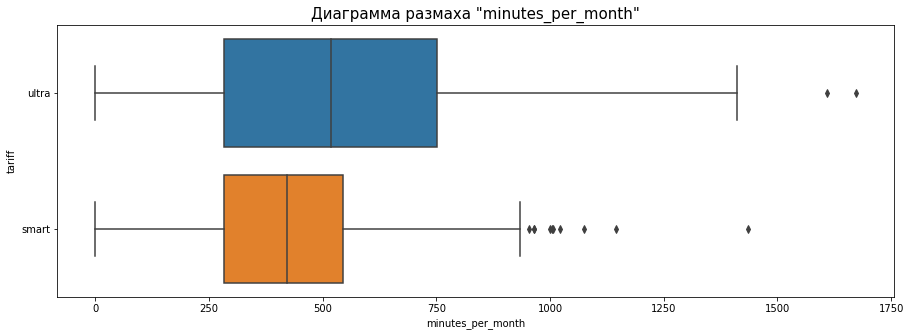

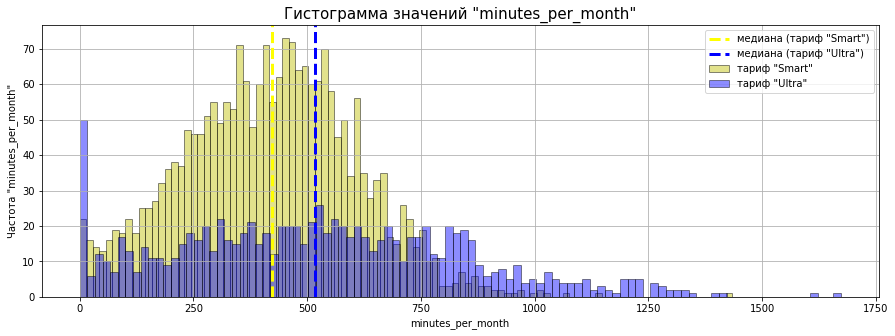

Медианное количество minutes_per_month для тарифа "Smart" = 422
Медианное количество minutes_per_month для тарифа "Ultra" = 518
------------------------------------------------------------------------------------------------------------


In [20]:
show_boxplot_and_hist('minutes_per_month')

**Мы видим, что:**
- Пользователи тарифа "Смарт" чаще всего не выходят из лимита 500 минут в месяц и им достаточно 422 минут.
- Пользователи тарифа "Ультра" при пакете в 3000 минут тратят 518 минут в месяц, но при этом размах "ящика" почти вдвое превосходит "ящик" по тарифу "Смарт", что говорит о том, что пользователи тарифа "Ультра" разговаривают значительно больше пользователей тарифа "Смарт".
- Для среднего пользователя (по медиане) тарифа "Ультра" по количеству минут практически подошел бы лимит минут тарифа "Смарт" в 500 минут.
***

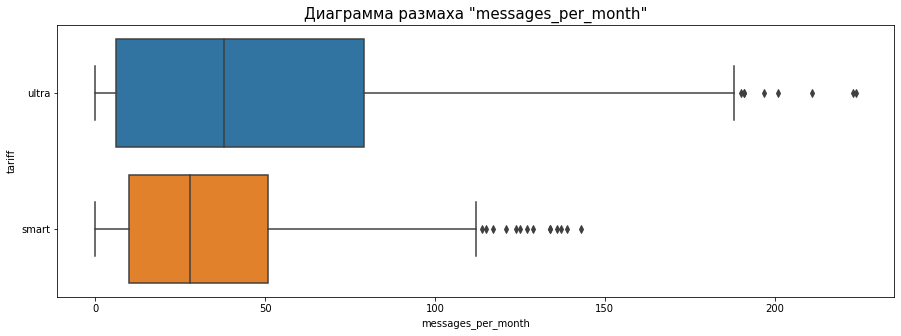

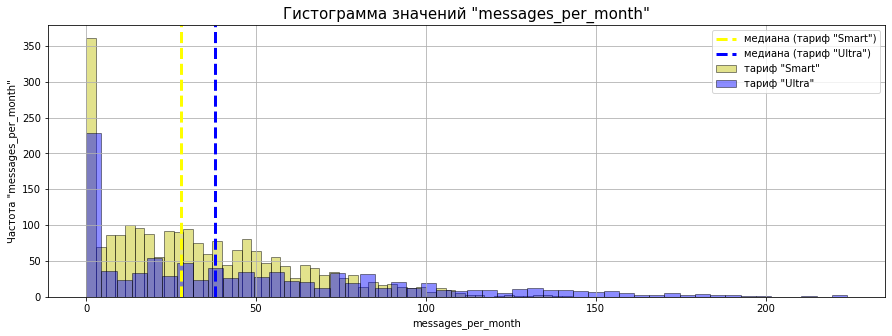

Медианное количество messages_per_month для тарифа "Smart" = 28
Медианное количество messages_per_month для тарифа "Ultra" = 38
------------------------------------------------------------------------------------------------------------


In [21]:
show_boxplot_and_hist('messages_per_month')

**Мы видим, что:**
- Значения кол-ва сообщений для обоих тарифов имеют распределение Пуассона.
- Пользователи тарифа "Смарт" чаще всего не выходят из лимита 50 сообщений и отправляют 28 сообщений.
- Пользователи тарифа "Ультра" при пакете в 1000 сообщений так же не расходуют лимит и отправляют 38 сообщений.
- Пользователи тарифа "Ультра" судя по размаху отправляют вдвое больше сообщений, чем пользователи "Смарта".
- Для пользователей тарифа "Ультра" по количеству сообщений подходит лимит сообщений тарифа "Смарт".
***

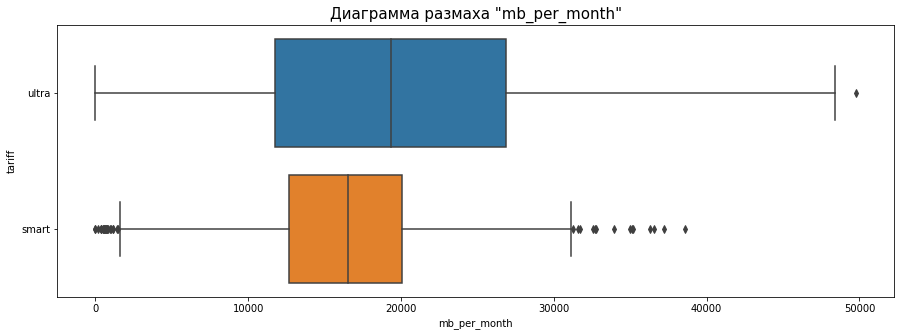

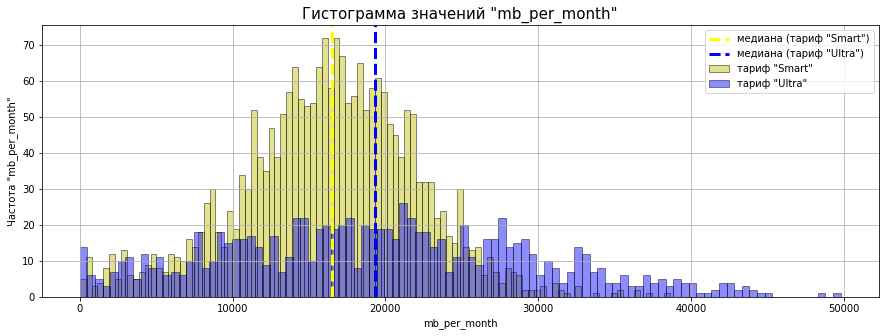

Медианное количество mb_per_month для тарифа "Smart" = 16531
Медианное количество mb_per_month для тарифа "Ultra" = 19324
------------------------------------------------------------------------------------------------------------


In [22]:
show_boxplot_and_hist('mb_per_month')

In [23]:
# переведем "Мб" в "Гб" для удобства 
print('16531 Мб =', 16531/1024, 'Гб')
print('19324 Мб =', 19324/1024, 'Гб')

16531 Мб = 16.1435546875 Гб
19324 Мб = 18.87109375 Гб


**Мы видим, что:**
- Пользователи тарифа "Смарт" в среднем выходят из лимита на 1 Гб из тарифного пакета в 15 Гб и тратят в среднем (по медиане) по 16 Гб интернет-трафика в месяц.
- Пользователи тарифа "Ультра" не расходуют за месяц весь пакет в 30 Гб, а используют в среднем (по медиане) только 18 Гб интернет-трафика.
- Пользователи тарифа "Ультра" судя по размаху тратят вдвое больше трафика, чем пользователи "Смарта".
***

### Подсчёт среднего кол-ва минут разговора, кол-ва сообщений и объёма интернет-трафика. Определение дисперсии и стандартного отклонения

Посчитаем средние значения кол-ва минут разговора, кол-ва сообщений и объёма интернет-трафика. А так же дисперсию и стандартное отклонение.

Возьмем для расчетов наш итоговый датафрейм `basic_users_parameters`.

In [24]:
# сделаем группировку по тарифу и определим для каждого из 3-х параметров тарифов: 
# среднее значение `mean`, 
# дисперсию `var` и 
# стандартное отклонение `std`

display(basic_users_parameters.groupby('tariff').agg({'minutes_per_month': ['mean', 'var', 'std']}).round(1))
print('----------------------------------------------------------------------------------------------------------------------')
display(basic_users_parameters.groupby('tariff').agg({'messages_per_month': ['mean', 'var', 'std']}).round(1))
print('----------------------------------------------------------------------------------------------------------------------')
display(basic_users_parameters.groupby('tariff').agg({'mb_per_month': ['mean', 'var', 'std']}).round(1))
print('----------------------------------------------------------------------------------------------------------------------')

minutes_per_month                 
                    mean       var    std
tariff                                   
smart              417.9   36219.3  190.3
ultra              526.6  100873.6  317.6

----------------------------------------------------------------------------------------------------------------------


messages_per_month              
                     mean     var   std
tariff                                 
smart                33.4   796.8  28.2
ultra                49.4  2285.3  47.8

----------------------------------------------------------------------------------------------------------------------


mb_per_month                      
               mean          var      std
tariff                                   
smart       16229.2   34545911.1   5877.6
ultra       19486.9  101935621.0  10096.3

----------------------------------------------------------------------------------------------------------------------


### Вывод

<div style="border:solid black 2px; padding: 20px">
    
В ходе исследования поведения клиентов при использовании тарифов "Смарт" и "Ультра" можно выделить следующие ключевые моменты:<br><br>
    
- Средние значения по 2-м тарифам немногим больше медианы, на это влияют выбросы и редкие значения в использовании трафика некоторыми пользователями.<br>
- В среднем (по медиане) пользователям тарифа "Смарт" в месяц требуется: <b>422</b> минут разговора, <b>28</b> сообщений, <b> 16 Гб</b> интернета.<br>
- В среднем (по медиане) пользователям тарифа "Ультра" в месяц требуется: <b>518</b> минут разговора, <b>38</b> сообщений, <b> 18 Гб</b> интернета.<br>
 
- Все характеристики тарифа "Ультра" имеют бОльшую дисперсию по сравнению с тарифом "Смарт".<br>
- Стандартное отклонение характеристик тарифа "Ультра" в среднем в 2 раза превосходит отклонение характеристик тарифа "Смарт".<br>
- Пользователи тарифа "Ультра" в среднем не расходуют весь пакет услуг.<br>
- Пользователи тарифа "Смарт" в среднем расходуют дополнительно 1 Гб интернет-трафика в месяц.<br>
</div>

## Проверка гипотез

### Гипотеза №1: о различии выручки пользователей тарифов «Ультра» и «Смарт» 

**Сформулируем нулевую гипотезу H0:**

- H0: Средняя выручка пользователей тарифов «Ультра» равна средней выручке пользователей тарифа «Смарт».

**Сформулируем альтернативную гипотезу H1:**

- H1: Средняя выручка пользователей тарифов «Ультра» отличается от средней выручки пользователей тарифа «Смарт».

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод `scipy.stats.ttest_ind`. В качестве массивов у нас уже созданы выборки отдельно по каждом тарифу: `smart_users` и `ultra_users`. Используем их в t-тесте. 
Критический уровень статистической значимости установим  = 0.05 и считаем его допустимым, т.к. в нашей гипотезе мы проверяем равенство или отличие выручек, и у нас нет информации от коммерческого департамента о возможных финансовых рисках, которые могли бы повлиять на наше решение снизить уровень значимости ниже 0.05.

In [25]:
alpha = 0.05
results = st.ttest_ind(smart_users['profit_from_user'], ultra_users['profit_from_user'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.172655564462924e-190
Отвергаем нулевую гипотезу


### Гипотеза №2: о различии выручки пользователей из Москвы и пользователей других регионов

**Сформулируем нулевую гипотезу H0:**

- H0: Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

**Сформулируем альтернативную гипотезу H1:**

- H1: Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

В качестве массивов создадим срезы `moscow_users` и `regional_users` в зависимости от местонахождения пользователя. 
Критический уровень статистической значимости установим = 0.05, т.к. в нашей гипотезе (так же как и в 1-ой) мы проверяем равенство или отличие выручек, и у нас нет информации от коммерческого департамента о возможных финансовых рисках, которые могли бы повлиять на наше решение снизить уровень значимости ниже 0.05.

In [26]:
# создадим 2 среза: с пользователями из Москвы и с пользователями из других регионов

moscow_users = basic_users_parameters.query('city == "Москва"')
regional_users = basic_users_parameters.query('city != "Москва"')

In [27]:
alpha = 0.05
results = st.ttest_ind(moscow_users['profit_from_user'], regional_users['profit_from_user'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


### Вывод

<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы проверили 2 гипотезы и определили, что:<br><br>
    
- Средняя выручка пользователей тарифов «Ультра» отличается от средней выручки пользователей тарифа «Смарт».<br>
- Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.<br>
    
</div>

## Анализ прибыльности тарифов "Смарт" и "Ультра"

На основании подтвердившейся гипотезы об отличии средней выручки тарифов "Смарт" и "Ультра", определим в каком тарифе средняя выручка больше и какой тариф принесет больше прибыли для оператора.

Посчитаем годовую среднюю выручку с каждого тарифа.

In [28]:
print('Кол-во пользователей тарифа "Смарт":', len(smart_users.groupby('user_id')))
print('Кол-во пользователей тарифа "Ультра":', len(ultra_users.groupby('user_id')))
print('----------------------------------------------------------------------------------------------------------------------')


# сгруппируем по месяцу каждый тарифный срез и найдем среднее значение выручки с 1 пользователя за месяц

mean_monthly_profit_smart = smart_users.groupby('month').agg({'profit_from_user':'mean'})
mean_monthly_profit_ultra = ultra_users.groupby('month').agg({'profit_from_user':'mean'})

print('В среднем выручка в месяц (за 2018 г.) с 1 пользователя тарифа "Смарт" составила (в руб.):', \
      (mean_monthly_profit_smart['profit_from_user'].mean().round()))
print('В среднем выручка в месяц (за 2018 г.) с 1 пользователя тарифа "Ультра" составила (в руб.):', \
      (mean_monthly_profit_ultra['profit_from_user'].mean().round()))
print('----------------------------------------------------------------------------------------------------------------------')

# посчитаем сколько в среднем за вычетом абонентской платы тратили пользователи на экстра-услуги

print('Доплата за экстра-услуги пользователями "Смарт"-тарифа в месяц в среднем составила (в руб.):', \
      (mean_monthly_profit_smart['profit_from_user'].mean().round())-550)
print('Доплата за экстра-услуги пользователями "Ультра"-тарифа в месяц в среднем составила (в руб.):', \
      (mean_monthly_profit_ultra['profit_from_user'].mean().round())-1950)
print('----------------------------------------------------------------------------------------------------------------------')

# и посчитаем исходя из кол-ва пользователей какая общая выручка в год

print('Общая выручка за 2018 г. с пользователей тарифа "Смарт" (в руб.):', \
      (mean_monthly_profit_smart['profit_from_user'].mean().round()) * 12 * len(smart_users.groupby('user_id')) )
print('Общая выручка за 2018 г. с пользователей тарифа "Ультра" (в руб.):', \
      (mean_monthly_profit_ultra['profit_from_user'].mean().round()) * 12 * len(ultra_users.groupby('user_id')) )
print('----------------------------------------------------------------------------------------------------------------------')

Кол-во пользователей тарифа "Смарт": 350
Кол-во пользователей тарифа "Ультра": 148
----------------------------------------------------------------------------------------------------------------------
В среднем выручка в месяц (за 2018 г.) с 1 пользователя тарифа "Смарт" составила (в руб.): 1130.0
В среднем выручка в месяц (за 2018 г.) с 1 пользователя тарифа "Ультра" составила (в руб.): 2039.0
----------------------------------------------------------------------------------------------------------------------
Доплата за экстра-услуги пользователями "Смарт"-тарифа в месяц в среднем составила (в руб.): 580.0
Доплата за экстра-услуги пользователями "Ультра"-тарифа в месяц в среднем составила (в руб.): 89.0
----------------------------------------------------------------------------------------------------------------------
Общая выручка за 2018 г. с пользователей тарифа "Смарт" (в руб.): 4746000.0
Общая выручка за 2018 г. с пользователей тарифа "Ультра" (в руб.): 3621264.0
------------

### Вывод

<div style="border:solid black 2px; padding: 20px">
    
При определении прибыльности тарифов было выявлено следующее:<br><br>
    
- Наиболее прибыльным тарифом для "Мегалайна" является тариф "Смарт".<br><br>
    
Это связано с тем, что (даже несмотря на его низкую абонентскую плату (550 руб.) по сравнению с тарифом "Ультра" (1950 руб.) и меньшую выручку в месяц с 1 пользователя) численность пользователей тарифа "Смарт" намного больше, чем пользователей тарифа "Ультра" (в 2,3 раза) и они чаще и больше (в 6,5 раз) пользователей "Ультра" платят за экстра-трафик.
  
</div>

## Общий вывод

<div style="border: ridge black 3px; padding: 25px">
    
<b>В результате проведенного исследования по определению наиболее перспективного тарифа для компании "Мегалайн" определено следующее:</b><br><br>
    
<b>Наиболее перспективным и приносящим за год больше выручки является тариф "Смарт".</b> При этом средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.<br><br>

Стоит также отметить, что:<br><br>
    
1. В среднем пользователям тарифа "Смарт" в месяц требуется: <b>422</b> минут разговора, <b>28</b> сообщений,<b> 16 Гб</b> интернета.<br>
2. В среднем пользователям тарифа "Ультра" в месяц требуется: <b>518</b> минут разговора, <b>38</b> сообщений, <b>18 Гб</b> интернета.<br>
3. Пользователи тарифа "Ультра" в среднем <b>не</b>  расходуют полностью весь пакет тарифа.<br>
4. Пользователи тарифа "Смарт" в среднем дополнительно расходут только +1 Гб интернет-трафика в месяц.<br><br>

Продвижение тарифа "Смарт" благоприятно скажется как в финансовом плане для компании, так и снизит расход энергетических мощностей "Мегалайна".<br><br>

Продвижение "Смарта" может быть успешным судя даже по среднестатистическому пользователю более дорогого тарифа "Ультра", который в среднем тратит только на 18 минут разговора больше и 3 Гб больше, что практически сопоставимо с пакетом "Смарта", но с небольшой возможной переплатой за доп.интернет-трафик.<br><br>

<b>В качестве рекомендации</b> и повышения лояльности пользователей можно предложить рассмотреть возможность коррекции тарифа "Смарт" или создание нового 3-го тарифа (например, "Смарт+"): увеличение включенных минут в пакет от 520 минут и увеличение пакета интернет-трафика до 18 Гб (с соразмерным увеличением месячной абонентской платы).<br>

</div>